In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install tensorflow tensorflow.gpu opencv-python matplotlib

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [3]:
import tensorflow as tf
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
#from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img

In [4]:
# Avoid OOM error by setting up GPU consumption

gpus = tf.config.experimental.list_physical_devices('GPU')

for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu,True)

In [5]:
tf.config.list_physical_devices('GPU')

[]

In [6]:
import cv2
import imghdr

In [7]:
os.data_dir = ("/content/drive/MyDrive/Colab Notebooks/Sports Images Classification")

In [8]:
len(os.data_dir)

67

In [9]:
image_ext = ['jpeg','jpg','bmp','png']

In [10]:
import numpy as np
from matplotlib import pyplot as plt

In [11]:
data = tf.keras.utils.image_dataset_from_directory("/content/drive/MyDrive/Colab Notebooks/Sports Images Classification")

Found 513 files belonging to 10 classes.


In [12]:
data_iterator = data.as_numpy_iterator()

In [14]:
batch = data_iterator.next()

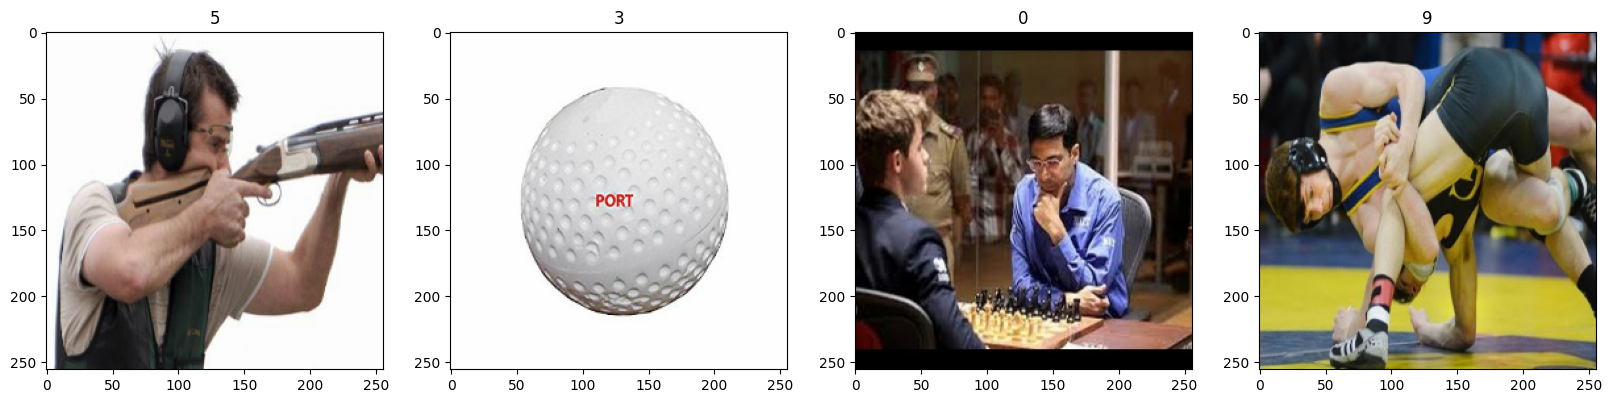

In [18]:
fig, ax=plt.subplots(ncols=4, figsize=(20,20))

for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

In [19]:
data = data.map(lambda x,y:(x/255,y))

In [20]:
data.as_numpy_iterator().next()

(array([[[[1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
          [1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
          [1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
          ...,
          [1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
          [1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
          [1.00000000e+00, 1.00000000e+00, 1.00000000e+00]],
 
         [[1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
          [1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
          [1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
          ...,
          [1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
          [1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
          [1.00000000e+00, 1.00000000e+00, 1.00000000e+00]],
 
         [[1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
          [1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
          [1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
          ...,
          [1.00000000e+00, 1.00000000e+00, 1.0000

In [21]:
train_size = int(len(data)*.7)
val_size=int(len(data)*.2)
test_size=int(len(data)*.1)

In [22]:
train = data.take(train_size)
test = data.skip(train_size).take(test_size)
val = data.skip(train_size+test_size).take(val_size)

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D, Dense, Flatten, Dropout

In [24]:
model = Sequential()

In [25]:
from keras.api._v2.keras import activations

In [26]:
from posix import access
model.add(Conv2D(16,(3,3),1, activation= 'relu', input_shape = (256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3),1, activation= 'relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16,(3,3),1, activation= 'relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [27]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics = ['accuracy'])

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

In [29]:
logdir = 'logs'

In [30]:
tensorboard_callback=tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [31]:
hist = model.fit(train,epochs = 10,validation_data= val, callbacks = [tensorboard_callback])

Epoch 1/10
11/11 [==============================] - 36s 3s/step - loss: -626.8655 - accuracy: 0.0710 - val_loss: -2791.2024 - val_accuracy: 0.0833
Epoch 2/10
11/11 [==============================] - 30s 3s/step - loss: -15453.5938 - accuracy: 0.0511 - val_loss: -40732.0039 - val_accuracy: 0.0938
Epoch 3/10
11/11 [==============================] - 33s 3s/step - loss: -151540.6875 - accuracy: 0.0739 - val_loss: -433574.0000 - val_accuracy: 0.1042
Epoch 4/10
11/11 [==============================] - 24s 2s/step - loss: -946341.4375 - accuracy: 0.0767 - val_loss: -2238911.7500 - val_accuracy: 0.1042
Epoch 5/10
11/11 [==============================] - 24s 2s/step - loss: -4374202.0000 - accuracy: 0.0795 - val_loss: -8224768.0000 - val_accuracy: 0.0729
Epoch 6/10
11/11 [==============================] - 28s 2s/step - loss: -15606988.0000 - accuracy: 0.0795 - val_loss: -27590094.0000 - val_accuracy: 0.0625
Epoch 7/10
11/11 [==============================] - 25s 2s/step - loss: -45973580.0000 -

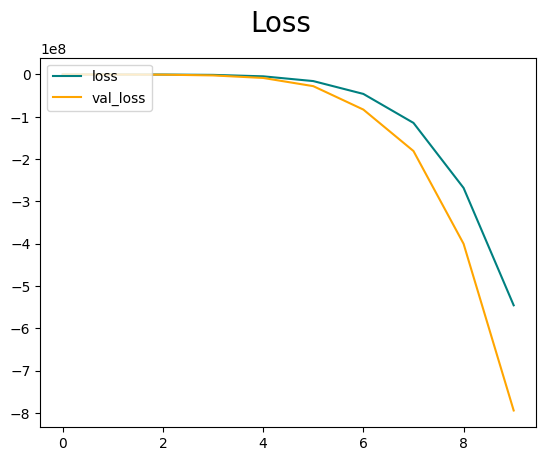

In [32]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

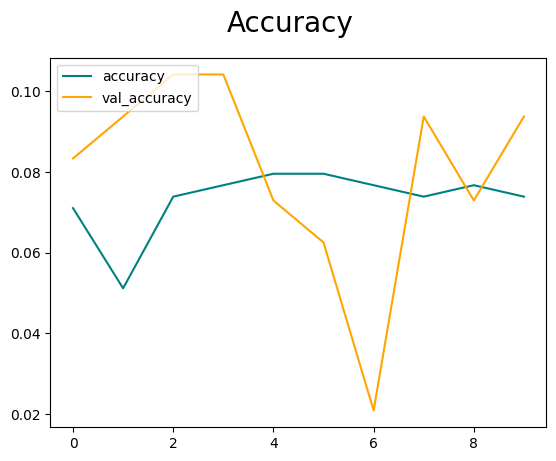

In [33]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [34]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [35]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [36]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 1s 676ms/step


In [37]:
print(f'Precision: {pre.result().numpy()}, Recall :{re.result().numpy()}, Accuracy :{acc.result().numpy()}')


Precision: 0.9375, Recall :1.0, Accuracy :0.03125


In [38]:
import cv2

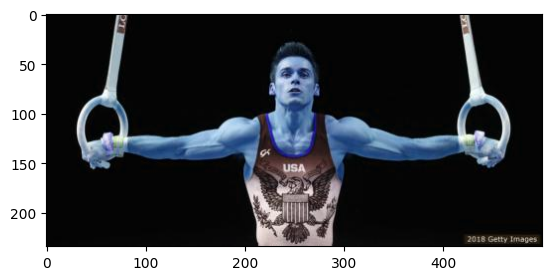

In [39]:
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Sports Images Classification/gymnastics/00000001.jpg')
plt.imshow(img)
plt.show() # gymnastics

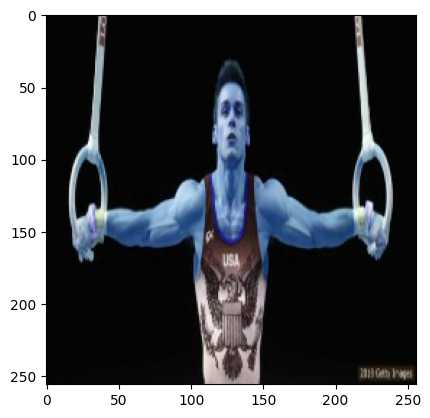

In [40]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [41]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 100ms/step


In [42]:
yhat

array([[1.]], dtype=float32)

In [45]:
if yhat > 0.5:
    print(f'Predicted class is gymnastics')
else:
    print(f'Predicted class is kabaddi')

Predicted class is gymnastics


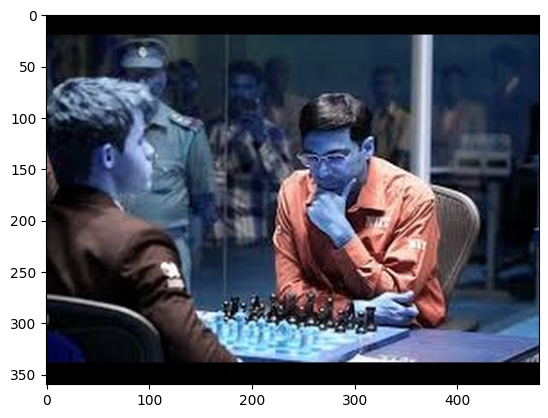

In [46]:
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Sports Images Classification/chess/00000001.jpg')
plt.imshow(img)
plt.show() # Chess

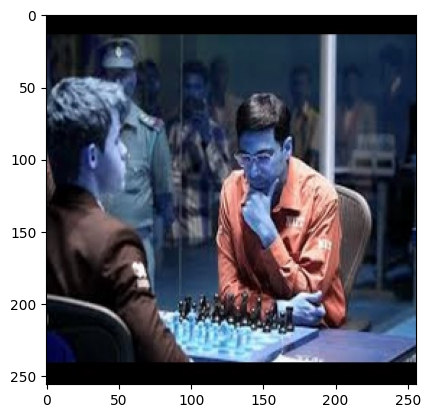

In [47]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [48]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 36ms/step


In [49]:
yhat

array([[1.]], dtype=float32)

In [50]:
if yhat > 0.5:
    print(f'Predicted class is Chess')
else:
    print(f'Predicted class is cricket ')

Predicted class is Chess


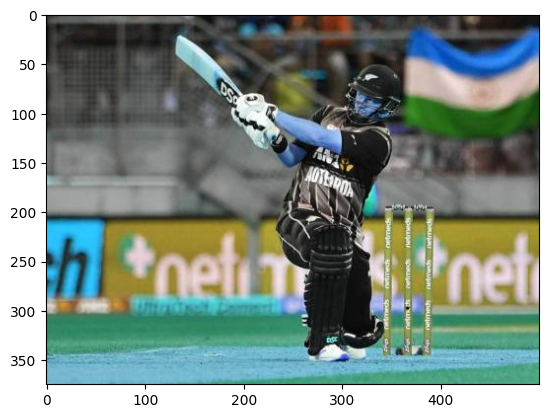

In [51]:
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Sports Images Classification/cricket/00000631.jpg')
plt.imshow(img)
plt.show() # cricket

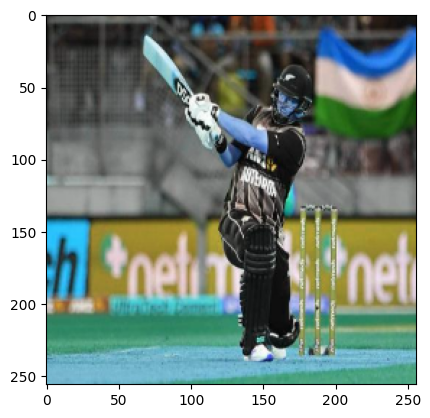

In [52]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [53]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 34ms/step


In [54]:
yhat

array([[1.]], dtype=float32)

In [55]:
if yhat > 0.5:
    print(f'Predicted class is cricket')
else:
    print(f'Predicted class is hockey ')

Predicted class is cricket


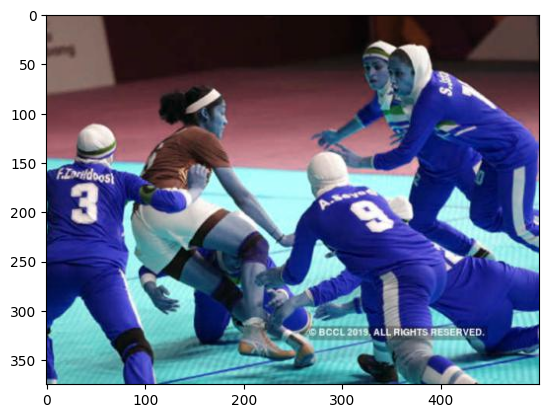

In [61]:
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Sports Images Classification/kabaddi/00000376.jpg')
plt.imshow(img)
plt.show() # kabaddi

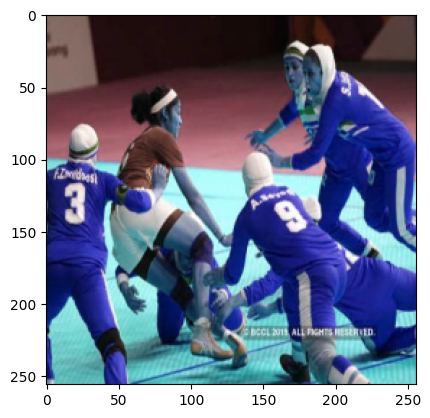

In [62]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [63]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 53ms/step


In [64]:
yhat

array([[1.]], dtype=float32)

In [65]:
if yhat > 0.5:
    print(f'Predicted class is kabaddi')
else:
    print(f'Predicted class is tennis ')

Predicted class is kabaddi


In [56]:
from tensorflow.keras.models import load_model

In [57]:
model.save(os.path.join("/content/drive/MyDrive/Colab Notebooks/Sports Images Classification/10class"))

In [58]:
New_model = load_model("/content/drive/MyDrive/Colab Notebooks/Sports Images Classification/10class")


In [59]:
New_Prediction = New_model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 171ms/step


In [60]:
New_Prediction

array([[1.]], dtype=float32)